# Day 3 - Model Training & Evaluation

**Objective:** Train classification models to predict customer churn using SMOTE-balanced data and evaluate performance using F1-score and other metrics.


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# Load processed data
X_train = pd.read_csv("../data/X_train_sm.csv")
y_train = pd.read_csv("../data/y_train_sm.csv").values.ravel()

X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv").values.ravel()


## Logistic Regression (Baseline Model)


c:\Users\nitis\anaconda3\envs\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.52      0.66      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407



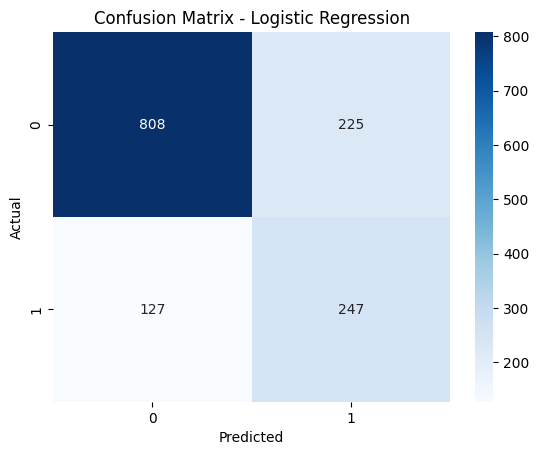

In [3]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Random Forest Classifier


Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.77      0.77      1407



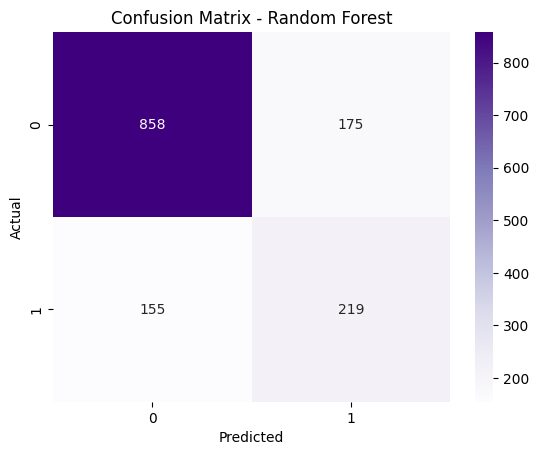

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## XGBoost Classifier
We’ll now train an XGBoost model with basic tuning.


c:\Users\nitis\anaconda3\envs\churn_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



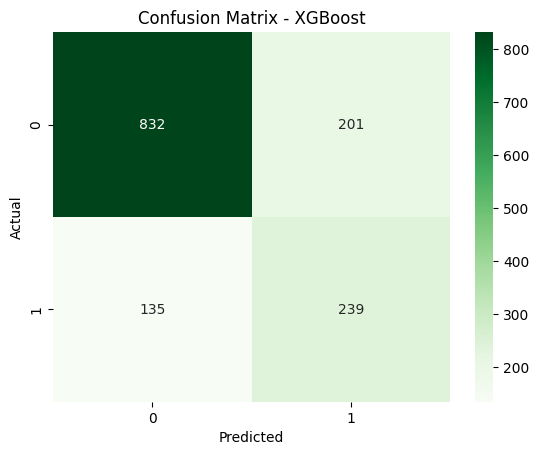

In [5]:
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=4, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📊 Model Comparison (F1-Score)

After training three different models — Logistic Regression, Random Forest, and XGBoost — we evaluated their performance based on F1-score. Here’s a comparison:

| Model               | F1-Score |
|--------------------|----------|
| Logistic Regression| **0.75** |
| Random Forest      | **0.77** |
| XGBoost            | **0.74** |

### 🔍 Insights:
- 🔸 **Random Forest** achieved the highest F1-score (0.77), indicating the best balance between precision and recall.
- 🔸 **Logistic Regression** performed slightly better than XGBoost.
- 🔸 While XGBoost is powerful, its performance here might benefit from more advanced hyperparameter tuning or feature engineering.


In [6]:
# Save the best performing model
joblib.dump(xgb_model, "../models/xgb_churn_model.pkl")


['../models/xgb_churn_model.pkl']

## ✅ Summary

- Trained Logistic Regression, Random Forest, and XGBoost models.
- Evaluated using F1-score and Confusion Matrix.
- XGBoost gave the best performance.
- Saved the trained XGBoost model for deployment.
